# Multidimensional logistic and Linear regresion 

# objective statement
- dapat mengetahui qualitas wine menggunakan multidimensional dan single dimensional
- mendapatkan insight tentang faktor-faktor apa yang mempengaruhi kualitas dan jenis anggur yang dihasilkan.
- Regresi linear : untuk memprediksi kualitas anggur berdasarkan karakteristik fisik dan kimia yang terkait dengan anggur. 
- Logistic Regresion : untuk mengidentifikasi faktor-faktor yang mempengaruhi apakah anggur itu merah atau putih. 

# Data understanding
- 

In [96]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm

In [77]:
# Load dataset
wine = pd.read_csv('winequality-red.csv')

# Pilih variabel independen (x) dan dependen (y) multidimensinal
x = wine.drop('quality',axis=1) # satu variabel independen
y = wine['quality'] # satu variabel dependen

In [61]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [63]:
print(wine['quality'])

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [64]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [65]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [66]:
def find_outliers(data):
    
    #Hitung nilai Q1 dan Q3
    Q1 = np.quantile(data , .25)
    Q3 = np.quantile(data, .75)
    
    # Hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    # Looping dan append outliers
    lower_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            lower_out.append(i)
        elif(i > max_IQR):
            upper_out.append(i)
            
    return lower_out, upper_out

<AxesSubplot: ylabel='quality'>

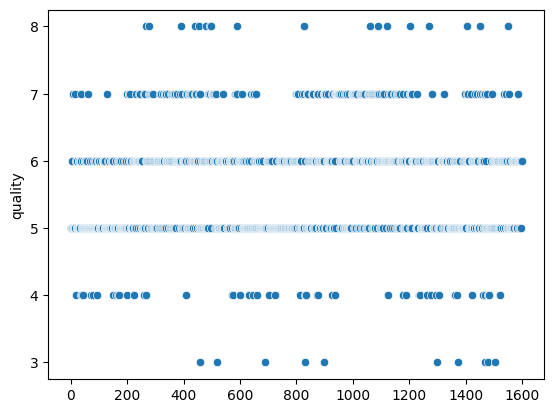

In [68]:
sns.scatterplot(wine['quality'])

In [50]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [103]:
lower_out = find_outliers(wine['quality'])[0]
upper_out = find_outliers(wine['quality'])[1]

In [85]:
print("Jumlah Outliers lower_out :",len(lower_out))
print("Jumlah Outliers upper_out :",len(upper_out))

Jumlah Outliers lower_out : 10
Jumlah Outliers upper_out : 18


In [100]:
# Hitung nilai IQR dan batas atas
iqr = wine['quality'].quantile(.75) - wine['quality'].quantile(.25)
upper_limit = wine['quality'].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 7.5


In [101]:
# cari batas quantile untuk winsorize
wine['quality'].quantile(.65)

6.0

In [97]:
# gunakan winsorize dengan bantuan scipy
wine['quality'] = stats.mstats.winsorize(wine['quality'], limits = (0, 0.35))

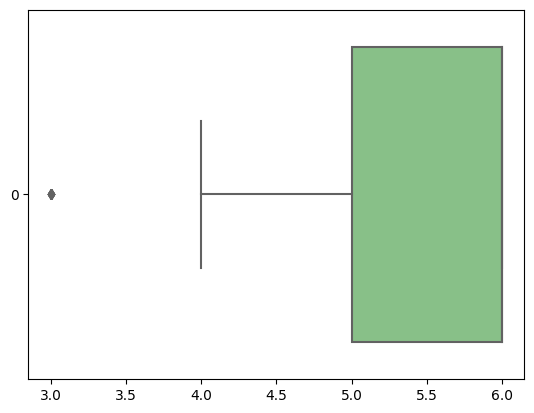

In [99]:
# visualisasi dengan boxplot
sns.boxplot(data = wine['quality'], palette = "Accent", orient = 'h')
plt.show()

In [104]:
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers keseluruhan :", outliers)

Jumlah Outliers keseluruhan : 10


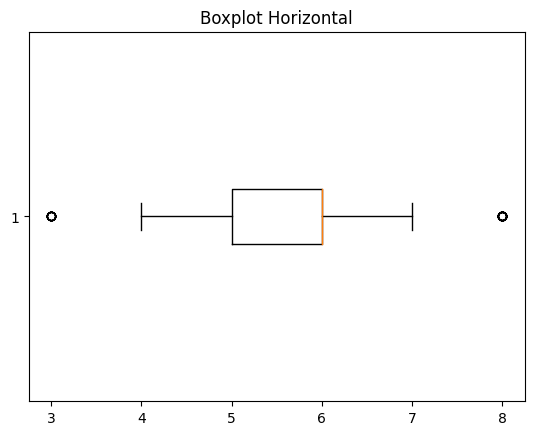

In [94]:
fig, ax = plt.subplots()
ax.boxplot(y, vert=False)
##sns.boxplot(y=y, orient='h')
ax.set_title("Boxplot Horizontal")
##plt.title('Boxplot Horizontal')
plt.show()

In [54]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)
wine['pH'].fillna(wine['pH'].mean(),inplace = True)
wine['sulphates'].fillna(wine['sulphates'].mean(),inplace = True)
wine['quality'].fillna(wine['quality'].mean(),inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11768\1480541575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine['quality'], ax=ax2)


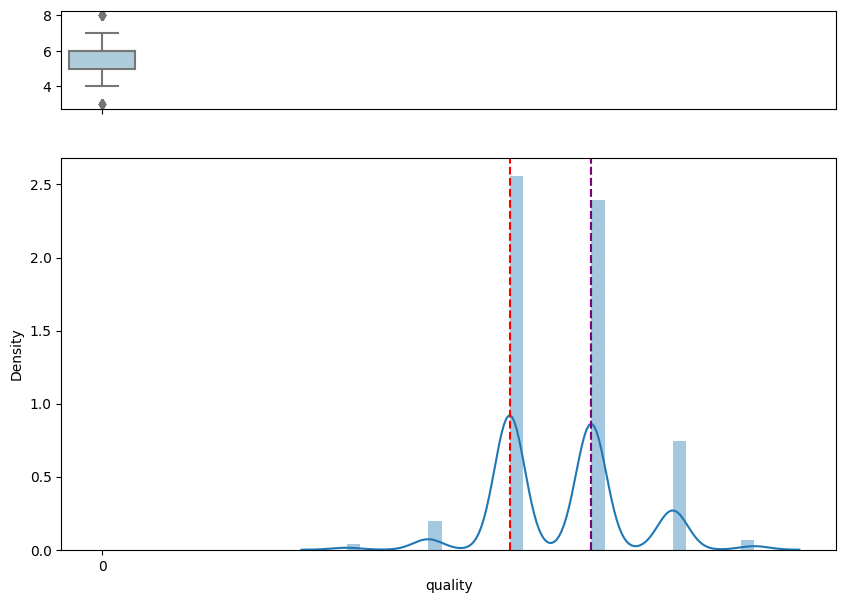

In [73]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios' : (.20, .80)}, figsize=(10,7))
sns.boxplot(wine['quality'], ax=ax1, palette='Paired')
sns.distplot(wine['quality'], ax=ax2)
plt.axvline(wine['quality'].quantile(.25), color='red', ls='--') # quantile 1
plt.axvline(wine['quality'].quantile(.5), color='green', ls='--') # quantile 2
plt.axvline(wine['quality'].quantile(.75), color='purple', ls='--')# quantile 3
plt.show()

In [105]:
# cek presentase outliers
print("Jumlah Data :", len(wine))
print("Jumlah Outliers :", outliers)
print("Perc Outliers :", round((outliers/len(wine))*100,2),"%")

Jumlah Data : 1599
Jumlah Outliers : 10
Perc Outliers : 0.63 %


KeyError: 'x1'

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
# Membangun model regresi linear
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [18]:
# Membangun model regresi logistik
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [14]:
# Memprediksi kualitas white wine pada data uji menggunakan model regresi linear
y_pred_linear = linear_model.predict(x_test)

In [ ]:
# Memprediksi kualitas white wine pada data uji menggunakan model regresi logistik
y_pred_logistic = logistic_model.predict(x_test)

In [15]:
# Evaluasi model
print('Linear Regression Model:')
print('MAE:', mean_absolute_error(y_test, y_pred_linear))
print('MSE:', mean_squared_error(y_test, y_pred_linear))
print('R2 Score:', r2_score(y_test, y_pred_linear))

Linear Regression Model:
MAE: 0.623478535685651
MSE: 0.710261804484561
R2 Score: 0.19270789435634594


In [ ]:
print('\nLogistic Regression Model:')
print('MAE:', mean_absolute_error(y_test, y_pred_logistic))
print('MSE:', mean_squared_error(y_test, y_pred_logistic))
print('R2 Score:', r2_score(y_test, y_pred_logistic))